Comparing chebyshev differentiation with backward differences

7.548868849042866e-06
1.034638086644087e-06


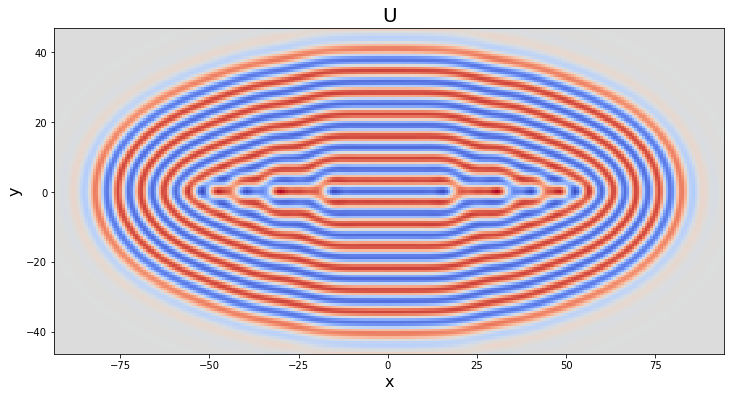

In [2]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import sys
sys.path.append('/Users/edwardmcdugald/Research/convection_patterns_wip/code/ml_experiments/my_experiments')
from myPDEFIND import *
import math

data = sio.loadmat("/Users/edwardmcdugald/Research/convection_patterns_wip/code/data/sh3.mat")

t_full = data['tt'].T[:,0]
x = data['xx'].T[0,:]
y = data['yy'].T[0,:]
U_full = data['uu']
#take surface values from t=299.5 to t=399
t = t_full[599:799]
U = U_full[:,:,599:799]

nx = len(x)
ny = len(y)
steps = len(t)
dx = x[1]-x[0]
dy = y[1]-y[0]
dt = t[1]-t[0]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
xx, yy = np.meshgrid(x,y)
ax1.pcolor(xx,yy,U[:,:,10].T,cmap='coolwarm')
ax1.set_title('U', fontsize = 20)
ax1.set_xlabel('x', fontsize = 16)
ax1.set_ylabel('y', fontsize = 16)

# Sample a collection of data points.
np.random.seed(0) # so that numbers are reproducible

num_xy = 100
num_t = 10
num_points = num_xy * num_t
boundary = 5
points = {}
count = 0
N = 2*boundary-1  # number of points to use in fitting
Nt = N

for p in range(num_xy):
    # if p % 100 == 0:
    #     print(p)
    x_idx = np.random.choice(np.arange(boundary,nx-boundary),1)[0]
    y_idx = np.random.choice(np.arange(boundary,ny-boundary),1)[0]
    for t_idx in range(num_t):
        #we want to cover evenly len(t) in our sampling
        t_idx_scale = math.floor(len(t)/num_t)
        t_idx_shift = max(math.floor((len(t)-t_idx_scale*num_t)/2),(Nt-1)//2)
        points[count] = [x_idx,y_idx,t_idx_scale*t_idx+t_idx_shift]
        count = count + 1


# Take up to second order derivatives.
u = np.zeros((num_points,1))
u_t1 = np.zeros((num_points,1))
u_t2 = np.zeros((num_points,1))

deg = 4 # degree of polynomial to use

# setting parameters for spectral derivatives
Lx = 2*x[len(x)-1] # Size of enclosing periodic rectangle
Ly = 2*y[len(y)-1]

for p in points.keys():
    # if p % 1000==0:
    #     print(p)
    [x_idx,y_idx,t_idx] = points[p]
    #u
    u[p] = U[x_idx,y_idx,t_idx]
    #u_t - comparing finite difference methods
    u_t1[p] = PolyDiffPoint(U[x_idx,y_idx,t_idx-(Nt-1)//2:t_idx+(Nt+1)//2], np.arange(Nt)*dt, deg, 1)
    u_t2[p] = BackwardDiff(U[:,:,t_idx],U[:,:,t_idx-1],dt)[x_idx,y_idx]

print(np.linalg.norm(u_t1-u_t2))
print(np.max(u_t1-u_t2))
